In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
# Read the csv file into a pandas DataFrame
player = pd.concat([pd.read_csv(f) for f in glob.glob('player_data/*.csv')], 
                             ignore_index = True)

player

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV.1,PP.1,SH.1,S,TOI,ATOI,BLK,HIT,FOW,FOL
0,Justin Abdelkader\abdelju01,20,DET,LW,2,0,0,0,0,2,...,0,0,0,6,24,12:13,0.0,5,5.0,7.0
1,Craig Adams\adamscr01,30,TOT,RW,75,4,7,11,-16,58,...,7,0,0,63,810,10:48,43.0,117,19.0,22.0
2,Kevyn Adams\adamske01,33,CHI,C,27,0,2,2,-7,13,...,0,0,2,32,295,10:56,11.0,13,103.0,104.0
3,Maxim Afinogenov\afinoma01,28,BUF,RW,56,10,18,28,-16,42,...,13,5,0,114,899,16:03,6.0,25,1.0,4.0
4,Andrew Alberts\alberan01,26,BOS,D,35,0,2,2,4,39,...,2,0,0,25,722,20:37,52.0,53,1.0,1.0
5,Daniel Alfredsson\alfreda01,35,OTT,RW,70,40,49,89,15,34,...,31,16,2,217,1560,22:17,30.0,55,21.0,18.0
6,Bobby Allen\allenbo01,29,BOS,D,19,0,0,0,-2,2,...,0,0,0,10,188,9:53,6.0,15,0.0,0.0
7,Bryan Allen\allenbr01,27,FLA,D,73,2,14,16,5,67,...,11,2,1,67,1554,21:17,119.0,112,0.0,0.0
8,Nik Antropov\antroni01,27,TOR,C,72,26,30,56,10,92,...,25,4,1,165,1448,20:07,51.0,102,114.0,157.0
9,Colby Armstrong\armstco01,25,TOT,RW,72,13,22,35,4,56,...,20,1,1,113,1157,16:04,31.0,85,3.0,12.0


In [36]:
# Drop duplicate players and NaN values
cleandf = player.drop(columns = ['Player', 'Tm', 'Pos', 'ATOI'])
cleandf.head()

,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,...,GW,EV.1,PP.1,SH.1,S,TOI,BLK,HIT,FOW,FOL
0,20,2,0,0,0,0,2,0.0,0,0,...,0,0,0,0,6,24,0.0,5,5.0,7.0
1,30,75,4,7,11,-16,58,-0.6,3,0,...,1,7,0,0,63,810,43.0,117,19.0,22.0
2,33,27,0,2,2,-7,13,-0.6,0,0,...,0,0,0,2,32,295,11.0,13,103.0,104.0
3,28,56,10,18,28,-16,42,1.6,9,1,...,1,13,5,0,114,899,6.0,25,1.0,4.0
4,26,35,0,2,2,4,39,1.2,0,0,...,0,2,0,0,25,722,52.0,53,1.0,1.0


In [37]:
cleandf['PTS'].describe()
cleandf.sum()

Age      234597.0
GP       444191.0
G         67604.0
A        115240.0
PTS      182844.0
+/-       -3185.0
PIM      270153.0
PS        22589.1
EV        49903.0
PP        15690.0
SH         2011.0
GW        10855.0
EV.1      83298.0
PP.1      29807.0
SH.1       2135.0
S        744470.0
TOI     7328882.0
BLK      342357.0
HIT      548485.0
FOW      725170.0
FOL      725158.0
dtype: float64

In [38]:
# Preprocessing the data
bins = (0, 34.5, 113)
group_names = ['no_playoffs', 'playoffs']
cleandf['PTS'] = pd.cut(cleandf['PTS'], bins = bins, labels = group_names)
cleandf['PTS'].unique()

[NaN, no_playoffs, playoffs]
Categories (2, object): [no_playoffs < playoffs]

In [39]:
label_quality = LabelEncoder()

In [40]:
cleandf['PTS'] = label_quality.fit_transform(cleandf['PTS'])

TypeError: '<' not supported between instances of 'str' and 'float'

In [27]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# Create linear regression model and fit training and testing data
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9055479396586532
Testing Score: 0.8817397952758785


Text(0.5, 1.0, 'Residual Plot')

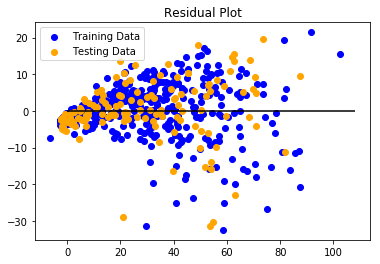

In [29]:
 # Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [32]:
# Print MSE and r2 values
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 62.74273603788442, R2: 0.8817397952758785
